In [1]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

/var/folders/mb/k7ytllq12898_g9h09d9x9r80000gp/T/ipykernel_87490/2714072112.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Function Definitions
def preprocess_data(df):
    X = df.drop(columns=['y'])
    y = df['y']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)
    return X_train, X_valid, y_train, y_valid

In [3]:
def evaluate_model(model, X_valid, y_valid):
    y_pred = model.predict(X_valid)
    print(classification_report(y_valid, y_pred, zero_division=1))

In [4]:
# Load the dataset
df = pd.read_csv("bank-full.csv", delimiter=";")
# Define feature types
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
binary_features = ['default', 'housing', 'loan', 'y']

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# pre-processing categorical_features
label_encoder = LabelEncoder()
for column in categorical_features:
    if column in df.columns: 
        df[column] = label_encoder.fit_transform(df[column])

for column in binary_features:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])
        

In [11]:
# Split the dataset based on the "marital" feature into three populations: married, single, and divorced
pop_married = df[df['marital'] == 1]
pop_single = df[df['marital'] == 2]
pop_divorced = df[df['marital'] == 0]
pca = PCA(n_components=0.5)

## Navi Bayes Classifier

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

def fit_nb(X_train, y_train):
    # Define the parameter grid
    #parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
    
    model = GaussianNB()
    
    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Plot the 5-fold cross-validation scores
    #scores = grid_search.cv_results_['mean_test_score']
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-')
    plt.title('5-Fold Cross-Validation Accuracy')
    plt.xlabel('Configuration')
    plt.ylabel('Accuracy')
    plt.xticks(range(1, len(scores) + 1))
    plt.grid(True)
    plt.show()

    # Print the mean accuracy over 5 folds
    print("Mean accuracy over 5 folds:", np.mean(scores))
    model.fit(X_train, y_train)
    return model

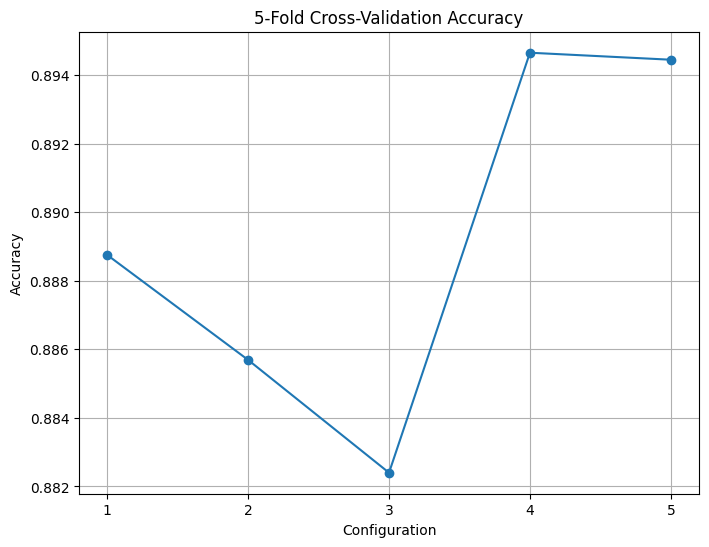

Mean accuracy over 5 folds: 0.8891884669757438
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2443
           1       0.06      0.01      0.01       279

    accuracy                           0.89      2722
   macro avg       0.48      0.50      0.48      2722
weighted avg       0.81      0.89      0.84      2722



In [19]:
# Preprocess data for married population and split into train/validation sets
X_train_married, X_valid_married, y_train_married, y_valid_married = train_test_split(
    pop_married.drop(columns=['y']), 
    pop_married['y'], 
    test_size=0.1, 
    random_state=42)

# Dimensionality Reduction for married population
X_train_married_pca = pca.fit_transform(X_train_married)

# Fit PCA with training data for married population
pca.fit(X_train_married)

# Transform validation data for married population
X_valid_married_pca = pca.transform(X_valid_married)

# Model fitting after dimensionality reduction for married population
nb_married_pca = fit_nb(X_train_married_pca, y_train_married)

# Model evaluation on validation set after dimensionality reduction for married population
evaluate_model(nb_married_pca, X_valid_married_pca, y_valid_married)

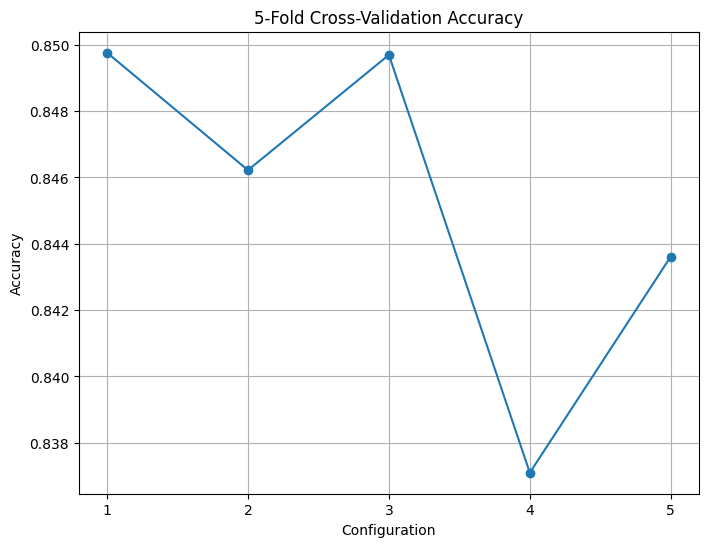

Mean accuracy over 5 folds: 0.8452780398626352
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1089
           1       0.50      0.02      0.03       190

    accuracy                           0.85      1279
   macro avg       0.68      0.51      0.48      1279
weighted avg       0.80      0.85      0.79      1279



In [20]:
# Preprocess data for single population and split into train/validation sets
X_train_single, X_valid_single, y_train_single, y_valid_single = preprocess_data(pop_single)

# Dimensionality Reduction for single population
X_train_single_pca = pca.fit_transform(X_train_single)

# Fit PCA with training data for single population
pca.fit(X_train_single)

# Transform validation data for single population
X_valid_single_pca = pca.transform(X_valid_single)

# Model fitting after dimensionality reduction for single population
nb_single_pca = fit_nb(X_train_single_pca, y_train_single)

# Model evaluation on validation set after dimensionality reduction for single population
evaluate_model(nb_single_pca, X_valid_single_pca, y_valid_single)

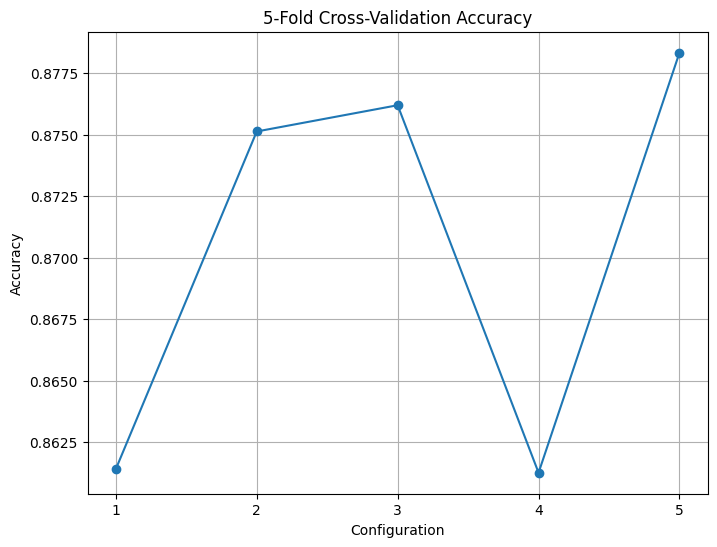

Mean accuracy over 5 folds: 0.8704671489328779
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       457
           1       0.14      0.02      0.03        64

    accuracy                           0.87       521
   macro avg       0.51      0.50      0.48       521
weighted avg       0.79      0.87      0.82       521



In [21]:
# Preprocess data for divorced population and split into train/validation sets
X_train_divorced, X_valid_divorced, y_train_divorced, y_valid_divorced = preprocess_data(pop_divorced)

# Dimensionality Reduction for divorced population
X_train_divorced_pca = pca.fit_transform(X_train_divorced)

# Fit PCA with training data for divorced population
pca.fit(X_train_divorced)

# Transform validation data for divorced population
X_valid_divorced_pca = pca.transform(X_valid_divorced)

# Model fitting after dimensionality reduction for divorced population
nb_divorced_pca = fit_nb(X_train_divorced_pca, y_train_divorced)

# Model evaluation on validation set after dimensionality reduction for divorced population
evaluate_model(nb_divorced_pca, X_valid_divorced_pca, y_valid_divorced)

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

def fit_rf(X_train, y_train):
    
    #n_estimators_values = [10, 50, 100, 150, 200]
    parameters = {'n_estimators': [10, 50, 100, 150, 200]}



    # for n in n_estimators_values:
    #     model = RandomForestClassifier(n_estimators=n, random_state=42)
    #     scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    #     cv_scores.append(np.mean(scores))
    
    model = RandomForestClassifier(random_state=42)
        
    grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_model = RandomForestClassifier(random_state=42, **best_params)
    best_model.fit(X_train, y_train)

    # Plot the 5-fold cross-validation scores
    cv_results = grid_search.cv_results_
    scores = cv_results['mean_test_score']
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-')
    plt.title('5-Fold Cross-Validation Accuracy (Random Forest)')
    plt.xlabel('Hyperparameter Configuration')
    plt.ylabel('Mean Accuracy')
    plt.grid(True)
    plt.show()

    # Print the mean accuracy over 5 folds
    print("Mean accuracy over 5 folds:", grid_search.best_score_)

    return best_model

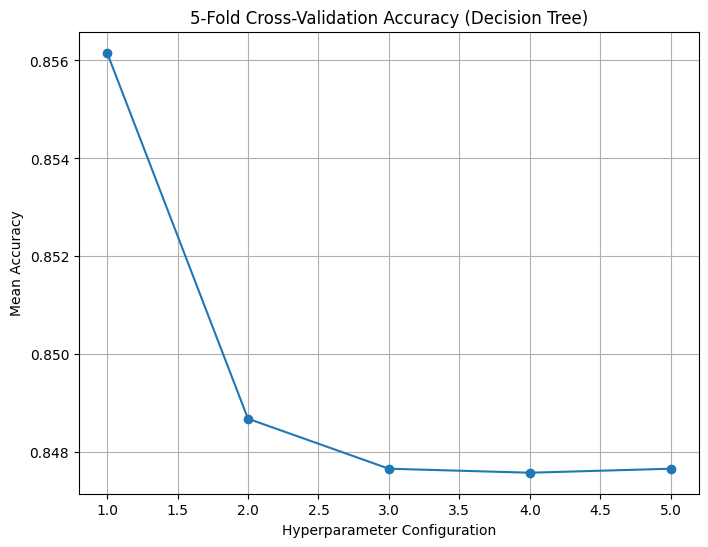

Mean accuracy over 5 folds: 0.8561573011250285
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2443
           1       0.23      0.19      0.21       279

    accuracy                           0.85      2722
   macro avg       0.57      0.56      0.56      2722
weighted avg       0.84      0.85      0.85      2722



In [26]:
# Preprocess data for married population and split into train/validation sets
X_train_married, X_valid_married, y_train_married, y_valid_married = preprocess_data(pop_married)

# Dimensionality Reduction for married population
X_train_married_pca = pca.fit_transform(X_train_married)

# Fit PCA with training data for married population
pca.fit(X_train_married)

# Transform validation data for married population
X_valid_married_pca = pca.transform(X_valid_married)

# Model fitting after dimensionality reduction for married population
rf_married_pca = fit_rf(X_train_married_pca, y_train_married)

# Model evaluation on validation set after dimensionality reduction for married population
evaluate_model(rf_married_pca, X_valid_married_pca, y_valid_married)

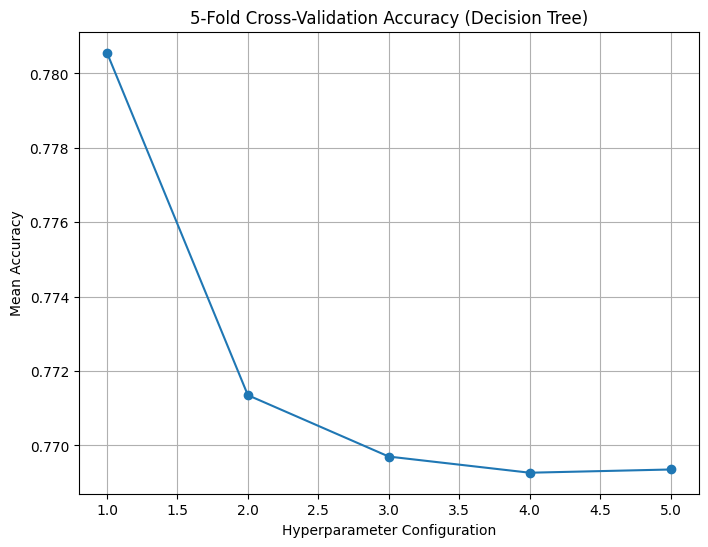

Mean accuracy over 5 folds: 0.7805583545505749
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1089
           1       0.22      0.18      0.20       190

    accuracy                           0.78      1279
   macro avg       0.54      0.53      0.54      1279
weighted avg       0.77      0.78      0.77      1279



In [27]:
# Preprocess data for single population and split into train/validation sets
X_train_single, X_valid_single, y_train_single, y_valid_single = preprocess_data(pop_single)

# Dimensionality Reduction for single population
X_train_single_pca = pca.fit_transform(X_train_single)

# Fit PCA with training data for single population
pca.fit(X_train_single)

# Transform validation data for single population
X_valid_single_pca = pca.transform(X_valid_single)

# Model fitting after dimensionality reduction for single population
rf_single_pca = fit_rf(X_train_single_pca, y_train_single)

# Model evaluation on validation set after dimensionality reduction for single population
evaluate_model(rf_single_pca, X_valid_single_pca, y_valid_single)

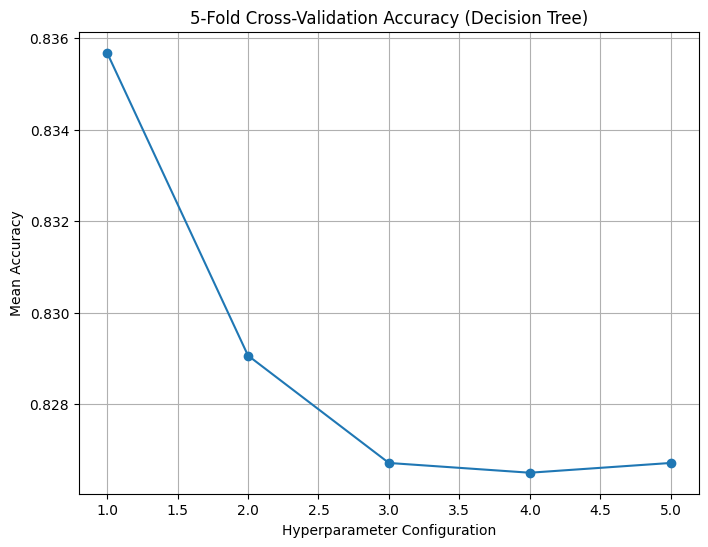

Mean accuracy over 5 folds: 0.8356807212602941
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       457
           1       0.29      0.23      0.26        64

    accuracy                           0.84       521
   macro avg       0.59      0.58      0.58       521
weighted avg       0.82      0.84      0.83       521



In [28]:
# Preprocess data for divorced population and split into train/validation sets
X_train_divorced, X_valid_divorced, y_train_divorced, y_valid_divorced = preprocess_data(pop_divorced)

# Dimensionality Reduction for divorced population
X_train_divorced_pca = pca.fit_transform(X_train_divorced)

# Fit PCA with training data for divorced population
pca.fit(X_train_divorced)

# Transform validation data for divorced population
X_valid_divorced_pca = pca.transform(X_valid_divorced)

# Model fitting after dimensionality reduction for divorced population
rf_divorced_pca = fit_rf(X_train_divorced_pca, y_train_divorced)

# Model evaluation on validation set after dimensionality reduction for divorced population
evaluate_model(rf_divorced_pca, X_valid_divorced_pca, y_valid_divorced)